In [28]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [6]:
file = 'rainfall_hadukgrid_uk_region_day_18910101-20211231.nc'

ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:     (time: 47847, region: 16, bnds: 2)
Coordinates:
  * time        (time) datetime64[ns] 1891-01-01T12:00:00 ... 2021-12-31T12:0...
  * region      (region) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
    geo_region  (region) |S26 ...
Dimensions without coordinates: bnds
Data variables:
    rainfall    (time, region) float64 ...
    time_bnds   (time, bnds) datetime64[ns] ...
Attributes:
    comment:        Daily resolution gridded climate observations
    creation_date:  2022-03-17T18:21:51
    frequency:      day
    institution:    Met Office
    references:     doi: 10.1002/joc.1161
    short_name:     daily_rainfall
    source:         HadUK-Grid_v1.1.0.0
    title:          Gridded surface climate observations data for the UK
    version:        v20220310
    Conventions:    CF-1.5

In [8]:
ds[ds.coords['geo_region'] == b'London                    ']

ValueError: Unsupported key-type <class 'xarray.core.dataarray.DataArray'>

In [20]:
region = b'London                    '
ds.geo_region.values
idx_london = np.where(ds.geo_region.values == region)[0][0]

In [22]:
london_data = ds.isel(region = idx_london)

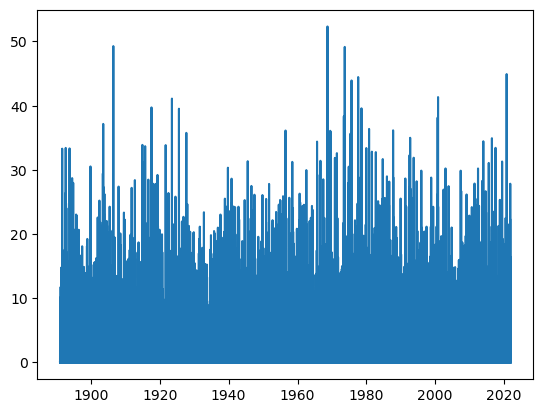

In [35]:
plt.plot(london_data.time_bnds.values[:,0],london_data.rainfall.values)

In [32]:
london_data.rainfall.values.shape

(47847,)

In [34]:
london_data.time_bnds.values[0]

array(['1891-01-01T09:00:00.000000000', '1891-01-02T09:00:00.000000000'],
      dtype='datetime64[ns]')